In [40]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib
import pymysql

# Loading the Data

In [41]:
# Establishing connection to the db

try:
    conn = pymysql.connect(
        host = 'localhost',
        database = 'sakila', 
        user = 'root', 
        password = 'pass')
    
except:
    print('Error connecting to the databse')
    
else:
    print('Connected to the Sakila database')


Connected to the Sakila database


In [42]:
# Query tested on MySQL to retrive data for analysis
myQuery = '''
SELECT 
	film.title, film.rental_rate, film.replacement_cost, film.rating, 
    store.store_id,
    address.district, city.city, country.country,
    rental.rental_id, DATE(rental.rental_date) AS rental_date, DATE(rental.return_date) AS return_date,
    datediff(DATE(rental.return_date), DATE(rental.rental_date)) AS rental_duration,
    payment.amount,
    customer.first_name, customer.last_name, customer.email
FROM 
	inventory
		INNER JOIN
    film ON inventory.film_id = film.film_id
		INNER JOIN
	store ON inventory.store_id = store.store_id
		INNER JOIN
	rental ON inventory.inventory_id = rental.inventory_id
		INNER JOIN
	address ON store.address_id = address.address_id
		INNER JOIN
	city ON address.city_id = city.city_id
		INNER JOIN
	country ON city.country_id = country.country_id
		INNER JOIN
	customer ON rental.customer_id = customer.customer_id
        INNER JOIN
    payment ON rental.rental_id = payment.rental_id;'''

In [43]:
# Executing SQL query
cursor = conn.cursor() 
cursor.execute(myQuery)
rows = cursor.fetchall()

# Converting the queried rows to a DataFrame
# DataFrames are more efficient and easier to make analysis

rows = np.asarray(rows)
columns = (['Film_Title', 'Film_Rental_Rate', 'Film_Replace_Cost', 'Film_Rating', 
            'Store_ID',
            'District', 'City', 'Country',
            'Rental_ID', 'Rental_Date', 'Rental_Return_Date',
            'Rental_Duration',
            'Payment_Amount',
            'Customer_First_Name', 'Customer_Last_Name', 'Customer_Email'])
df = pd.DataFrame(rows, columns = columns)

# Closing the connection
cursor.close()
conn.close()

# OVERVIEW OF THE DATA

In [44]:
df.shape

(16044, 16)

DF has: 16044 rows and 15 columns

In [45]:
df.head()

,Film_Title,Film_Rental_Rate,Film_Replace_Cost,Film_Rating,Store_ID,District,City,Country,Rental_ID,Rental_Date,Rental_Return_Date,Rental_Duration,Payment_Amount,Customer_First_Name,Customer_Last_Name,Customer_Email
0,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,4863,2005-07-08,2005-07-11,3,0.99,JOEL,FRANCISCO,JOEL.FRANCISCO@sakilacustomer.org
1,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,11433,2005-08-02,2005-08-11,9,3.99,GABRIEL,HARDER,GABRIEL.HARDER@sakilacustomer.org
2,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,14714,2005-08-21,2005-08-30,9,3.99,DIANNE,SHELTON,DIANNE.SHELTON@sakilacustomer.org
3,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,972,2005-05-30,2005-06-06,7,1.99,NORMAN,CURRIER,NORMAN.CURRIER@sakilacustomer.org
4,ACADEMY DINOSAUR,0.99,20.99,PG,1,Alberta,Lethbridge,Canada,2117,2005-06-17,2005-06-23,6,0.99,BEATRICE,ARNOLD,BEATRICE.ARNOLD@sakilacustomer.org


In [46]:
df.describe()

,Film_Title,Film_Rental_Rate,Film_Replace_Cost,Film_Rating,Store_ID,District,City,Country,Rental_ID,Rental_Date,Rental_Return_Date,Rental_Duration,Payment_Amount,Customer_First_Name,Customer_Last_Name,Customer_Email
count,16044,16044,16044,16044,16044,16044,16044,16044,16044,16044,15861,15861,16044,16044,16044,16044
unique,958,3,21,5,2,2,2,2,16044,41,84,11,19,591,599,599
top,BUCKET BROTHERHOOD,0.99,22.99,PG-13,2,QLD,Woodridge,Australia,4863,2005-07-31,2005-08-04,7,4.99,MARION,HUNT,ELEANOR.HUNT@sakilacustomer.org
freq,34,5652,1044,3585,8121,8121,8121,8121,1,679,534,1821,3789,68,46,46


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Film_Title           16044 non-null  object
 1   Film_Rental_Rate     16044 non-null  object
 2   Film_Replace_Cost    16044 non-null  object
 3   Film_Rating          16044 non-null  object
 4   Store_ID             16044 non-null  object
 5   District             16044 non-null  object
 6   City                 16044 non-null  object
 7   Country              16044 non-null  object
 8   Rental_ID            16044 non-null  object
 9   Rental_Date          16044 non-null  object
 10  Rental_Return_Date   15861 non-null  object
 11  Rental_Duration      15861 non-null  object
 12  Payment_Amount       16044 non-null  object
 13  Customer_First_Name  16044 non-null  object
 14  Customer_Last_Name   16044 non-null  object
 15  Customer_Email       16044 non-null  object
dtypes: o

We can see that Return_Date has 15861 Non-Null values. Let's verify how many Nulls there are.

In [48]:
count=0
for i in df['Rental_Return_Date']:
    if(i is None):
        count+=1
print(count)

183


In [49]:
15861+count

16044

So, we have 183 Null values that match with the 16044 when summed with 15861 Non-Null values.

This evidence means that 183 times people did not return the movies DVD. 

# Analyzing Numerical Fields

Let's analyze the data types of each field

In [50]:
df['Payment_Amount'].dtype

dtype('O')

Pandas freely uses object dtype when columns contain mixed values (strings, numbers, nan).

So we have to give each column its proper data type.

In [51]:
df['Film_Rental_Rate']    = pd.to_numeric(df['Film_Rental_Rate'])
df['Film_Replace_Cost']   = pd.to_numeric(df['Film_Replace_Cost'])
df['Rental_ID']           = pd.to_numeric(df['Rental_ID'])
df['Rental_Date']         = pd.to_datetime(df['Rental_Date'])
df['Rental_Return_Date']  = pd.to_datetime(df['Rental_Return_Date'])
df['Rental_Duration']     = pd.to_numeric(df['Rental_Duration'])
df['Payment_Amount']      = pd.to_numeric(df['Payment_Amount'])

In [52]:
df.describe()

,Film_Rental_Rate,Film_Replace_Cost,Rental_ID,Rental_Date,Rental_Return_Date,Rental_Duration,Payment_Amount
count,16044.000000,16044.000000,16044.000000,16044,15861,15861.000000,16044.000000
mean,2.942630,20.215443,8025.371478,2005-07-22 20:13:38.548990336,2005-07-25 12:00:51.749574528,5.025219,4.201356
min,0.990000,9.990000,1.000000,2005-05-24 00:00:00,2005-05-25 00:00:00,0.000000,0.000000
25%,0.990000,14.990000,4013.750000,2005-07-07 00:00:00,2005-07-10 00:00:00,3.000000,2.990000
50%,2.990000,20.990000,8025.500000,2005-07-28 00:00:00,2005-08-01 00:00:00,5.000000,3.990000
75%,4.990000,25.990000,12037.250000,2005-08-17 00:00:00,2005-08-20 00:00:00,7.000000,4.990000
max,4.990000,29.990000,16049.000000,2006-02-14 00:00:00,2005-09-02 00:00:00,10.000000,11.990000
std,1.649678,6.081771,4632.777249,NaN,NaN,2.611835,2.362961


- The maximun payed amount was 11.99
- The average payed amount is 4.20
- The maximum rental duration was 10 days
- The average rental duration is 5 days
- The replacement cost for all the movies in between 29.99 and 9.99
- The average replacement cost is 20.22

# Country Sales
Analyzing the sales by each country

<Axes: title={'center': 'Number of Rentals by Country'}, xlabel='Country', ylabel='Number of Rentals'>

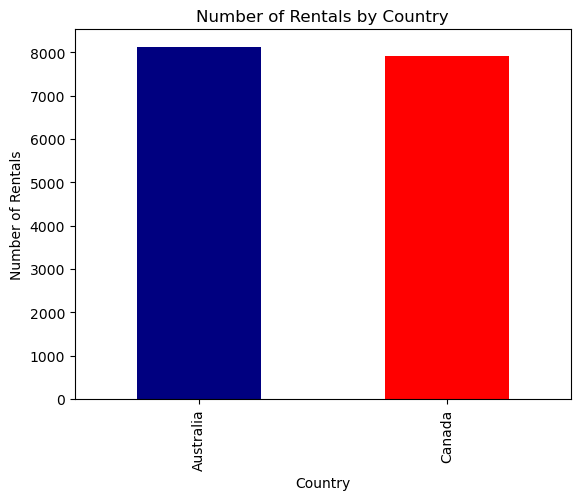

In [91]:
df['Country'].value_counts().plot(kind   = 'bar',
                                  title  = 'Number of Rentals by Country',
                                  color  = ['navy', 'red'],
                                  xlabel = 'Country', 
                                  ylabel = 'Number of Rentals'
                                  )